# Computer Assignment 3: LLN, CLT, Inequalities & Statistics 

> **Probability and Statistics, Dr. Mojahedian (Fall 2024)**

### Information  
Complete the information box below.

In [153]:
full_name = ''
student_id = ''

You do not need to write a report for this assignment. Simply write your answers in the empty markdown cells and fill in the empty cells for each question. All you need to do is complete the given notebook and upload the completed version.

## Q1. Graph Networks, CLT, and Thermodynamics

> *For your questions on this section, refer to aradkashani@yahoo.com or @aradmnk on Telegram. Telegram is answered faster.*

> *The use of ChatGPT or other LLM copilots is not only allowed, but also **recommended**.*

In this section, we aim to understand how thermodynamic laws arise directly from probability and statistics.

### 1.1 Graph Networks

We first need to understand a type of data structure: **Graph Networks**. Graphs are uniquely defined by a set $V$, its vertices or *nodes*, and a set of edges $E$, that connects these nodes to each other. More rigorously, $E = \left\{\left(x,y\right) | x,y \in V\right\}$, where usually $x \neq y$. Mathematically, a graph is denoted by the ordered pair $G = (V,E)$. Graphs can be categorized into different types such as undirected graphs, directed graphs (or di-graphs), weighted graphs, etc.

We will use the `networkx` python package to deal with graphs. Make sure to install it if you do not have it installed. Here are some demo codes so you can understand how to work with graphs using `networkx`. In this section you need not do anything; these are just pieces of code so that you can learn to work with `networkx`.

In [ ]:
# Run this cell if you do not have networkx installed
!pip install networkx

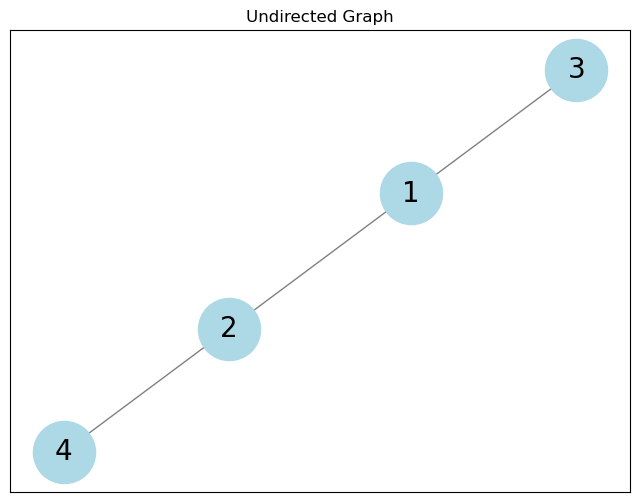

In [155]:
## Example 1: Line graph

import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4])

# Add edges
G.add_edges_from([(1, 2), (1, 3), (2, 4)])

# Draw the graph
plt.figure(figsize=(8, 6))

# if draw_networkx doesn't work, tell GPT to change it to nx.draw or something
nx.draw_networkx(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=20)
plt.title("Undirected Graph")
plt.show()

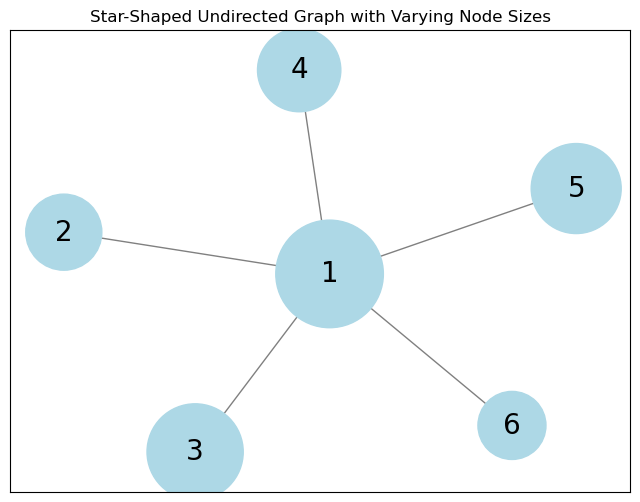

In [156]:
## Example 2: a star graph
star_graph = nx.Graph()

# Add nodes with size attribute
nodes_with_size = [(1, {"size": 1000}), (2, {"size": 500}), (3, {"size": 800}), (4, {"size": 600}), (5, {"size": 700}), (6, {"size": 400})]
star_graph.add_nodes_from(nodes_with_size)

# Add edges to form a star shape (node 1 is the center)
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]
star_graph.add_edges_from(edges)

# Extract node sizes
node_sizes = [star_graph.nodes[node]["size"]*6 for node in star_graph.nodes]

# Draw the graph with varying node sizes
plt.figure(figsize=(8, 6))
nx.draw_networkx(star_graph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=node_sizes, font_size=20)
plt.title("Star-Shaped Undirected Graph with Varying Node Sizes")
plt.show()

In [1]:
## Example 3: A fully-connected graph with colorized nodes

import random

# Create a fully connected graph (complete graph) of size 10
complete_graph = nx.complete_graph(10)

# Add a "heat" attribute to each node with a random value between 0 and 100
for node in complete_graph.nodes:
    complete_graph.nodes[node]['heat'] = random.randint(0, 100)

# Extract node heat values
node_heat = [complete_graph.nodes[node]['heat'] for node in complete_graph.nodes]

# Normalize heat values for color mapping
heat_min = min(node_heat)
heat_max = max(node_heat)
node_colors = [(heat - heat_min) / (heat_max - heat_min) for heat in node_heat]

# Draw the fully connected graph with node colors based on heat attribute
plt.figure(figsize=(10, 8))
cmap = plt.cm.coolwarm
nx.draw_networkx(complete_graph, with_labels=True, node_color=node_colors, cmap=cmap, edge_color='gray', node_size=1000, font_size=12)
plt.title("Fully Connected Graph with Heat Attribute")

# There is a chance this line gives an error. It has something to do with matplotlib versions. Tell GPT to solve it or something
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Heat')
plt.show()

NameError: name 'nx' is not defined

### 1.2 Energy Quanta

In physics, particles can exchange energy with each other. However, this energy comes in discrete packets or **quantas**. A graph is given to you below, where the nodes are meant to represent particles. Add an `energy` attribute to each of the nodes and give each node between 1,000 to 2,000 energy. Make sure this energy is discrete (an `int`). Draw the graph with the number of energy packets, and color them based on how many energy quanta they have.

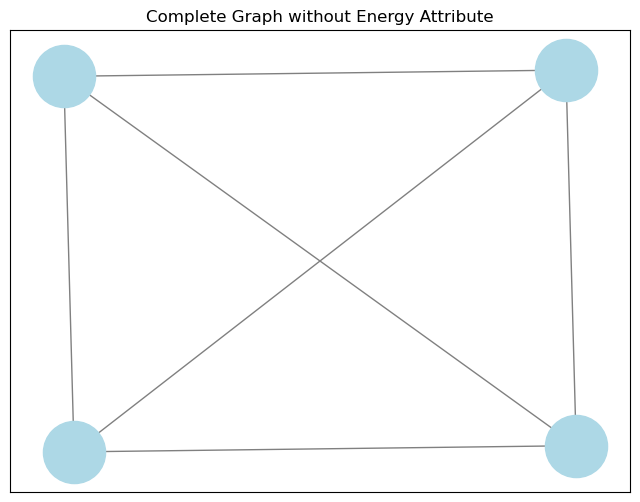

In [158]:
## DO NOT TOUCH THIS CELL

import networkx as nx
import matplotlib.pyplot as plt

complete_graph = nx.complete_graph(4)

plt.figure(figsize=(8, 6))
nx.draw_networkx(complete_graph, with_labels=False, node_color='lightblue', edge_color='gray', node_size=2000, font_size=20)
plt.title("Complete Graph without Energy Attribute")
plt.show()

In [ ]:
# TODO

### 1.3 Energy Transmission

Now, at each timestep, let each of the particles (nodes) give one of its energy quanta to its neighbors. The neighbor is chosen at random, with uniform distribution. For instance, if one node has 3 neighbors, it will choose any of its neighbors with a probability of $\frac{1}{3}$.

This repeat for all of the nodes.

Repeat this experiment for $N=10,000$ timesteps. Draw the graph with their energy after $N$ steps.

Now that you got a feel for what we want to do, it is time to scale this up. You may reuse your previous code.

### 1.4 The Second Law of Thermodynamics

The second law of thermodynamics states that:
> Heat always flows spontaneously from hotter to colder regions of matter (or 'downhill' in terms of the temperature gradient).

A grid-like graph (a **lattice**) is given to you below. The energy packets are also distributed for you. We are trying to simulate when a hot object comes to touch a cold object.

In [2]:
import matplotlib.colors as mcolors

dim = 20
G = nx.grid_graph(dim=(dim, dim))

initial_energy = {}
for (x, y) in G.nodes():
    if y < dim/2:
        initial_energy[(x, y)] = 0
    else:
        initial_energy[(x, y)] = 1000

nx.set_node_attributes(G, initial_energy, 'energy')
node_energy = [G.nodes[node]['energy'] for node in G.nodes] # this one is a list

# colormap
cmap = plt.cm.coolwarm
norm = mcolors.Normalize(vmin=min(node_energy), vmax=max(node_energy))

plt.figure(figsize=(12, 12))
pos = {(x, y): (y, -x) for x, y in G.nodes()}  # Position nodes in a grid layout
nx.draw_networkx(G, pos, with_labels=False, node_color=node_energy, cmap=cmap, edge_color='gray', node_size=50)
plt.title("Grid Graph with Energy Attribute")

# this line below might require change, depending on your matplotlib version
# in case of errors, tell GPT to correct it or something
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Energy')
plt.show()

NameError: name 'nx' is not defined

A good measure of *spread* is the standard deviation $\sigma$. Find the standard deviation $\sigma$ for the energy of all the particles.

Run the packet transmission simulation $N=100,000$ times. Change the amount of energy quanta transmitted for every node to a random number between 1 and 50 (of course, the particles cannot contain negative energy). What do you observe?

> Do not let particles with 0 energy give energy quanta to other particles.

> **DISCLAIMER**: The calculation for this part can take a long, long time!

What is the *spread* of the heat after the simulation?

Count how many *cold* nodes have become *colder* and how many *hot* nodes have become *hotter* than before.

Show the nodes that you have counted above.

Does the *Second Law of Thermodynamics* hold true?

Keep the simulation results in memory. The next part needs it!

### 1.5 Entropy
*(The one from probability and statistics. In physics, there is another entropy, but the two have connections to each other and the formulas are similar)*

We are interested in finding a variable called *Entropy*. Entropy is "a measure of how much uncertainty there is in a probability distribution". Some interpret it as a "measure of disorder". Entropy (in probability theory) is mathematically defined as:

$$ E = \mathbb{E}\left[\log_2{\frac{1}{f_X(x)}} \right] = \mathbb{E}\left[-\log_2{f_X(x)} \right],$$

where $X$ is a random variable, and $f_X(x)$ is its PDF (or PMF). Since we are using $\log$ base $2$, the unit of entropy is *bits*. 

Draw a histogram of the particle energies, one from before (I saved it for you in `node_energy`), and one for the after.

Now, normalize this plot. If you remember, a histogram is a frequentist view of the *distribution*. Let's assume the histogram truly represents the real distribution (it probably does not, in reality).

Your variables are discrete. Change the plot such that all the probabilities add up to 1.

Back to our original goal: calculating $ E = \mathbb{E}\left[\log_2{\frac{1}{f_X(x)}} \right] $. There is a statistical method to get rid of the expectation: **Monte-Carlo Estimation** (or *MCE*). MCE states that if we have access to $N$ samples of $x_i$ that really come from the distribution of $\mathbb{X}$;

For continuous variables:
$$
\mathbb{E}\left[g(X)\right] =
\int^{+\infty}_{-\infty} g(x)f_X(x)dx \approx \frac{1}{N}\sum^{N}_{i=1} g(x_i)
$$

For discrete variables:
$$
\mathbb{E}\left[g(X)\right] =
\sum_{x \in \mathcal{X}} g(x)p_X(x) \approx \frac{1}{N}\sum^{N}_{i=1} g(x_i)
$$

Use this to achieve an estimation for the entropy $E_1$, the entropy of the initial system, and $E_2$, the entropy after the simulation.

Another way of stating the *Second Law of Thermodynamics* is:

> Entropy is always increasing in an **isolated** system.

Given that your system is isolated (with no external disturbances applied), does the Second Law of Thermodynamics still hold true?

### 1.6 CLT

Once again, you are given a graph below.

C:\Users\Arad\AppData\Local\Temp\ipykernel_52248\4236573621.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Energy')


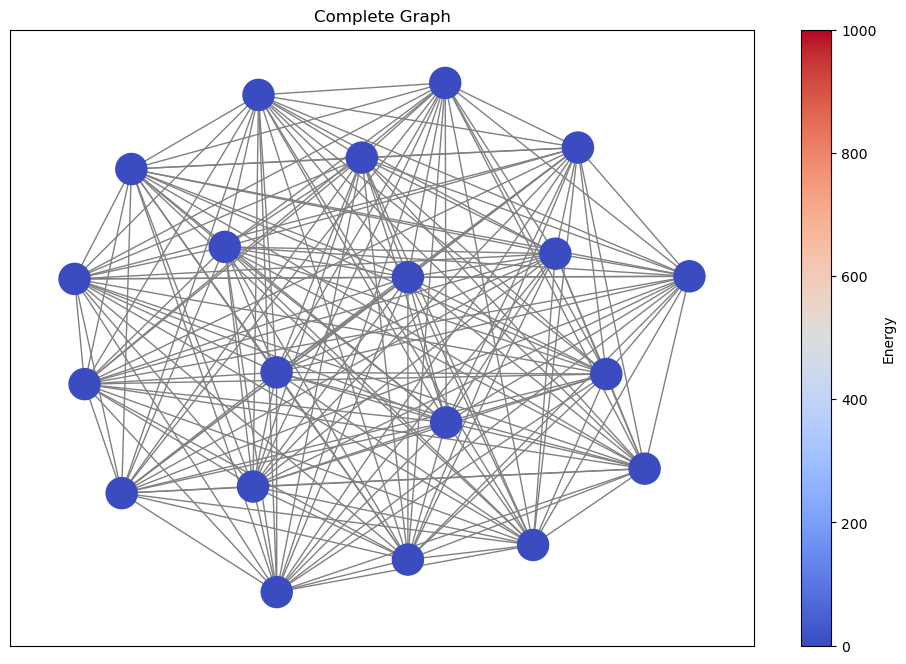

Mean Energy: 10.0
Standard Deviation of Energy: 0.0


In [191]:
## DO NOT TOUCH THIS CELL

import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Create a complete graph with 20 nodes
G = nx.complete_graph(20)

# Assign random energy to each node
for node in G.nodes:
    G.nodes[node]['energy'] = 10

cmap = plt.cm.coolwarm

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization

plt.figure(figsize=(12, 8))
# Extract energy values from the graph nodes
energy_values = [G.nodes[node]['energy'] for node in G.nodes]

# Normalize energy values for color mapping
norm = mcolors.Normalize(vmin=min(node_energy), vmax=max(node_energy))
# this line below might require change, depending on your matplotlib version
# in case of errors, tell GPT to correct it or something
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Energy')

nx.draw_networkx(G, pos, with_labels=False, node_color=energy_values, cmap=cmap, node_size=500, edge_color='gray')
plt.title('Complete Graph')
plt.show()

# Calculate mean and standard deviation
mean_energy = np.mean(energy_values)
std_energy = np.std(energy_values)

print(f"Mean Energy: {mean_energy}")
print(f"Standard Deviation of Energy: {std_energy}")

#### Task 1: Entropy over time

Run the energy transmission simulation $N = 100,000$ times. Let each particle exchange only `1` quanta of energy each step. Calculate the entropy using MCE every $n=500$ steps, and plot the entropy over time.

#### Task 2: CLT

We are interested in understanding how summing random variables can lead to a more-or-less predictable distribution, a phenomenon known as the **Central Limit Theorem**. 

Repeat the same energy transmission simulation with the complete graph given above $N=10,000$ times, and record the energy of each particle at the last step, denote it as $e^k_p$ (energy $e$ of particle $p$ at experiment $k$). Now, repeat the simulation $100$ times. Then, plot a histogram of $e = \bigcup\limits_{1 \leq k \leq 100;\ p \in V} \{e^k_{p}\}$ (the set for all of the energy values after repeating the simulation 10,000 times).

> **NOTE:** To get the correct distribution, you *must* allow energy to become negative (i.e a node with energy -12 can give its energy quanta to become -13 energy). The reason is further explained in the next section *"For interested readers"*.

Which version of the Central Limit Theorem can you use to explain why this distribution arises?

#### For interested readers

The physical system moves towards maximum entropy, no matter what. [This link](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution#Examples) can help you see what distributions maximize entropy given what condition. This means by changing the limits and bounds of the distribution, you get a different distribution. You can give it a try yourself, stop letting the energy values from becoming negative; you will end up with an exponential distribution instead. This is because the distribution function that maximizes the entropy given a specified mean and positive values only, is the exponential distribution.

## Q2

Assume that $ X_1, X_2, \dots, X_n $ are independent and identically distributed (i.i.d.) samples from a Poisson distribution with parameter $ \lambda $. We are given the following estimators:

1. $ \hat{\Lambda}_1 = \frac{1}{n} \sum_{i=1}^{n} X_i $  (Sample Mean)
2. $ \hat{\Lambda}_2 = \max(X_1, X_2, \dots, X_n) $ (Maximum Value)
3. $ \hat{\Lambda}_3 = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $ (Sample Standard Deviation)
4. $ \hat{\Lambda}_4 = \text{mode}(X_1, \dots, X_n) $ (Mode of the Samples)

### Part 1) Simulate Samples
- Generate $ n = 10 $ samples from a Poisson distribution with parameter $ \lambda = 4 $ for $ N = 1000$ times.
- Repeat this process $ 1000 $ times (i.e., generate 1000 samples) to estimate the parameters.


In [ ]:
#TODO


### Part 2) Bias and Variance Estimation
- Calculate the bias and variance of each estimator and compare the results with the theoretical values.
  


In [ ]:
#TODO

### Part 3) Unbiased Estimator Identification
- Identify which of the four estimators are unbiased.



In [ ]:
#TODO

### Part 4) Plot Mean Difference
- For biased estimators, plot the difference between the estimated mean and the true value $ \lambda $ across simulations.



In [ ]:
#TODO

### Part 5) Intuitive Comparison
- Based on the bias, variance, and MSE, intuitively analyze which estimator performs better.

In [ ]:
#TODO



# Q3

The company previously measured that the average lifetime of lamps was 1570 hours with a standard deviation of 120 hours. We are provided with data from a new manufacturing process, where a sample of 100 lamps had an average lifetime of 1600 hours. We will test the hypothesis that the average lifetime of the lamps is now different from 1570 hours.




### Problem Overview:

1. **Generate Gaussian Distribution**: Create a function that generates `n` random variables following a Gaussian distribution with a specified mean and standard deviation.


In [ ]:
#TODO

2. **Calculate Mean**: Calculate the mean of the generated data.


In [ ]:
#TODO

3. **Check Statistical Significance**: Create a function to check if the difference between the true mean and the sample mean is statistically significant.


In [ ]:
#TODO

4. **Determine Sample Size for Statistical Significance**: Create a function to determine the required sample size $ N $ for the difference between two means to be statistically significant.



In [ ]:
#TODO

Now to solve the problem:

5. **Generate random variables** for sample sizes of $ n = 10, 100, 1000 $ with a mean of 1600 hours and a standard deviation of 120 hours.


In [ ]:
#TODO

6. **Use the tools created** to determine if the difference in means is statistically significant for confidence levels of 0.8, 0.9, 0.95, 0.99, and 0.999.


In [ ]:
#TODO

7. **Determine the minimum sample size** $ n $ for which the difference in means becomes statistically significant.


In [ ]:
#TODO

8. **Repeat the steps** for a different standard deviation of 240 hours.

In [ ]:
#TODO


9. **Determine the maximum variance** for which the difference in means is statistically significant for the given sample sizes and confidence levels.

In [ ]:
#TODO